# **Project Name**    - Voyage Analytics: Integrating MLOps in Travel Productionization of ML Systems



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**           - Ayush Dattatray Bhagat




# **Project Summary -**

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.


# **GitHub Link -**

https://github.com/Ayushx29/Voyage-Analytics-Integrating-MLOps-in-Travel-Productionization-of-ML-Systems


# **Problem Statement**


This capstone project explores the intersection of data analytics and machine learning in the travel and tourism industry by leveraging datasets on users, flights, and hotels. The goal is to develop predictive models for flight price forecasting, hotel recommendations, and gender classification to enhance travel personalization and decision-making. Additionally, the project incorporates MLOps techniques such as model deployment, automation, and scalability using Flask, Docker, Kubernetes, Jenkins, Apache Airflow, and MLFlow, ensuring a seamless and efficient machine learning pipeline.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
flights_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter Masters Projects/Voyage Analytics/travel_capstone/flights.csv",on_bad_lines='skip')
hotels_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter Masters Projects/Voyage Analytics/travel_capstone/hotels.csv",on_bad_lines='skip')
users_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter Masters Projects/Voyage Analytics/travel_capstone/users.csv",on_bad_lines='skip')

### Dataset First View

In [4]:
# Dataset First Look
flights_df.head(10)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
5,2,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019
6,3,0,Aracaju (SE),Campo Grande (MS),economic,743.54,1.69,650.10,Rainbow,10/17/2019
7,3,0,Campo Grande (MS),Aracaju (SE),economic,877.56,1.69,650.10,Rainbow,10/20/2019
8,4,0,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,10/24/2019
9,4,0,Florianopolis (SC),Recife (PE),economic,695.30,1.76,676.53,Rainbow,10/26/2019


In [5]:
hotels_df.head(10)

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019
5,15,0,Hotel BD,Natal (RN),2,242.88,485.76,01/09/2020
6,22,0,Hotel Z,Aracaju (SE),2,208.04,416.08,02/27/2020
7,29,0,Hotel AU,Recife (PE),4,312.83,1251.32,04/16/2020
8,32,0,Hotel AF,Sao Paulo (SP),2,139.10,278.20,05/07/2020
9,33,0,Hotel K,Salvador (BH),4,263.41,1053.64,05/14/2020


In [6]:
users_df.head(10)

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44
5,5,4You,Trina Thomas,none,47
6,6,4You,Jesse Decelle,male,46
7,7,4You,Gregoria Gil,female,21
8,8,4You,Jack Sabo,none,41
9,9,4You,Debbie Helms,none,35


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
flights_df.shape

(271888, 10)

In [8]:
hotels_df.shape

(40552, 8)

In [9]:
users_df.shape

(1340, 5)

### Dataset Information

In [10]:
# Dataset Info
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [11]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [12]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
users_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
users_df.isnull().sum()

,0
code,0
company,0
name,0
gender,0
age,0


### What did you know about your dataset?

The dataset contains 1340 rows and 5 columns : code, company, name, gender, and age. The code column represents a unique identifier, while company indicates the organization associated with each user. The name column stores users full names, and gender specifies whether the user is male or female. Lastly, the age column provides the age of each user. The dataset appears to be well-structured, with no missing values in any column

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
users_df.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [16]:
# Dataset Describe
users_df.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


### Variables Description

The code column represents a unique identifier, while company indicates the organization associated with each user. The name column stores users full names, and gender specifies whether the user is male or female. Lastly, the age column provides the age of each user.

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
users_df.nunique()

,0
code,1340
company,5
name,1338
gender,3
age,45


In [18]:
users_df['company'].value_counts()

,count
company,
4You,453
Acme Factory,261
Wonka Company,237
Monsters CYA,195
Umbrella LTDA,194


In [19]:
users_df[users_df['name']=='Charlotte Johnson']

,code,company,name,gender,age
316,316,4You,Charlotte Johnson,female,64
496,496,Monsters CYA,Charlotte Johnson,none,51


In [20]:
users_df.describe(include = 'object')

,company,name,gender
count,1340,1340,1340
unique,5,1338,3
top,4You,Charlotte Johnson,male
freq,453,2,452


In [21]:
users_df['gender'].value_counts()

,count
gender,
male,452
female,448
none,440


In [22]:
users_df1=users_df[(users_df['gender']=='male') | (users_df['gender']=='female') ]

In [23]:
label_encoder = LabelEncoder()

users_df1['company_encoded'] = label_encoder.fit_transform(users_df1['company'])
users_df1['gender_encoded'] = label_encoder.fit_transform(users_df1['gender'])

In [24]:
users_df1.head(10)

,code,company,name,gender,age,company_encoded,gender_encoded
0,0,4You,Roy Braun,male,21,0,1
1,1,4You,Joseph Holsten,male,37,0,1
2,2,4You,Wilma Mcinnis,female,48,0,0
3,3,4You,Paula Daniel,female,23,0,0
4,4,4You,Patricia Carson,female,44,0,0
6,6,4You,Jesse Decelle,male,46,0,1
7,7,4You,Gregoria Gil,female,21,0,0
10,10,4You,Melvin Lovejoy,male,36,0,1
11,11,4You,Virginia Roberts,female,61,0,0
12,12,4You,David Thomas,male,53,0,1


In [25]:
from sentence_transformers import SentenceTransformer

In [26]:
model = SentenceTransformer('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6')

In [27]:
text_columns = ['name']

for column in text_columns:
    users_df1[column + '_embedding'] = users_df1[column].apply(lambda text: model.encode(text))

# Concatenate the embeddings into a single feature vector
text_embeddings = users_df1[text_columns].values.tolist()

In [28]:
n_components = 23
pca = PCA(n_components=n_components)
text_columns = ['name']

text_embeddings_pca = np.empty((len(users_df1), n_components * len(text_columns)))

for i, column in enumerate(text_columns):
    embeddings = users_df1[column + '_embedding'].values.tolist()
    embeddings_pca = pca.fit_transform(embeddings)
    text_embeddings_pca[:, i * n_components:(i + 1) * n_components] = embeddings_pca

numerical_features=['code','company_encoded','age']


X_numerical = users_df1[numerical_features].values

# Combine PCA-transformed text embeddings and numerical features
X = np.hstack((text_embeddings_pca, X_numerical))
# Target variable
y = users_df1['gender_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
print(len(text_embeddings))
print("Shape of X:", X.shape)

900
Shape of X: (900, 26)


In [30]:
users_df1[numerical_features].values

array([[   0,    0,   21],
       [   1,    0,   37],
       [   2,    0,   48],
       ...,
       [1337,    3,   28],
       [1338,    3,   52],
       [1339,    3,   35]])

## ***3. ML Model Implementation***

### Logistic Regression


In [31]:
# ML Model - 1 Implementation
lr_classifier = LogisticRegression(random_state=42)
# Fit the Algorithm
lr_classifier.fit(X_train, y_train)
# Predict on the model
y_pred_lr = lr_classifier.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.9611111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        77
           1       0.95      0.98      0.97       103

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



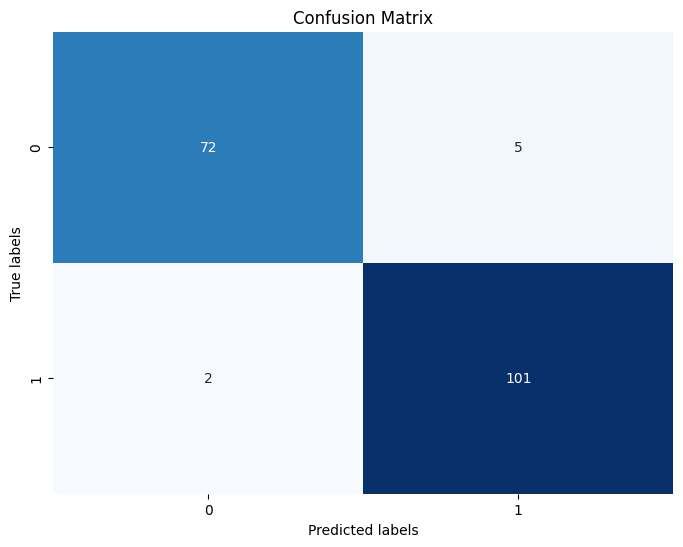

In [32]:
# Visualizing evaluation Metric Score chart
accuracy = lr_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_lr)
print("\nClassification Report:\n", report)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
lr_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = lr_classifier.predict(X_train)
y_val_pred = lr_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 0.9722222222222222
Validation Accuracy: 0.9666666666666667
The model is overfitting.


In [34]:
model_result = pd.DataFrame([['Logistic Regression Baseline', train_accuracy,val_accuracy]],
               columns = ['Model', 'Train accuracy', 'Validation accuracy'])

model_result

,Model,Train accuracy,Validation accuracy
0,Logistic Regression Baseline,0.972222,0.966667


### Decision Tree Classifier


In [35]:
 # ML Model - 2 Implementation
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.5333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.40      0.42        77
           1       0.59      0.63      0.61       103

    accuracy                           0.53       180
   macro avg       0.52      0.52      0.52       180
weighted avg       0.53      0.53      0.53       180



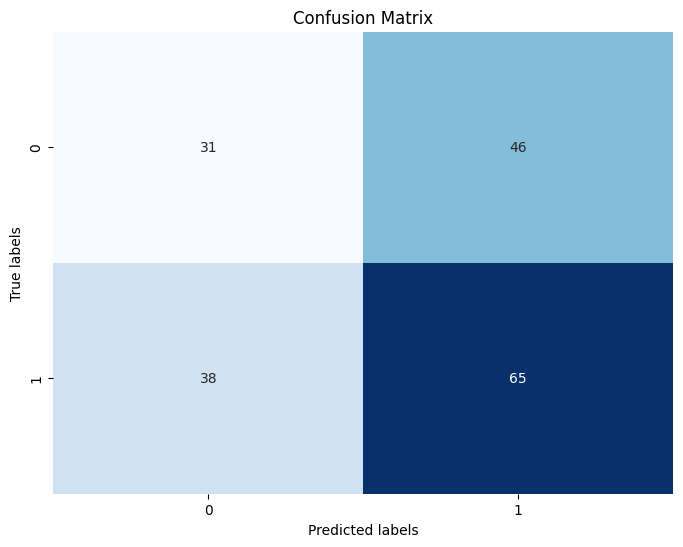

In [36]:
# Visualizing evaluation Metric Score chart
accuracy = dt_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_dt)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = dt_classifier.predict(X_train)
y_val_pred = dt_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 1.0
Validation Accuracy: 0.9611111111111111
The model is overfitting.


In [38]:
model = pd.DataFrame([['Decesion Tree Classifier Baseline', train_accuracy,val_accuracy]],
               columns = ['Model', 'Train accuracy', 'Validation accuracy'])
model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,Train accuracy,Validation accuracy
0,Logistic Regression Baseline,0.972222,0.966667
1,Decesion Tree Classifier Baseline,1.000000,0.961111


### Random Forest Classifier

In [39]:
# ML Model - 3 Implementation
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the Algorithm
rf_classifier.fit(X_train, y_train)
# Predict on the model
y_pred_rf = rf_classifier.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        77
           1       0.93      0.99      0.96       103

    accuracy                           0.95       180
   macro avg       0.96      0.94      0.95       180
weighted avg       0.95      0.95      0.95       180



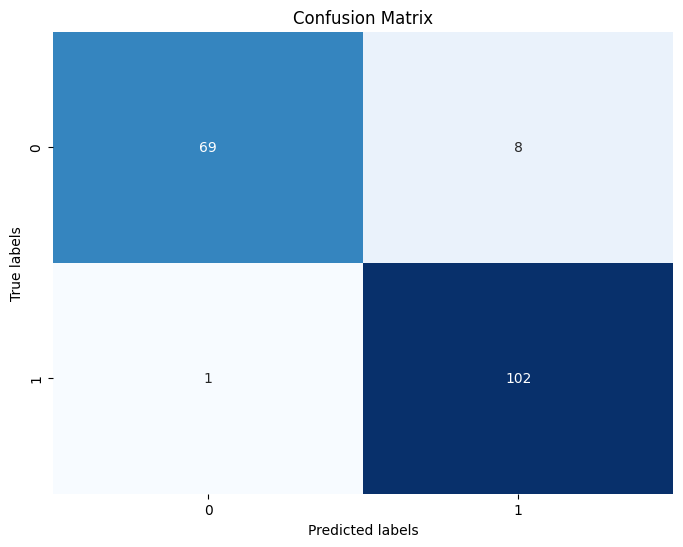

In [40]:
# Visualizing evaluation Metric Score chart
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = rf_classifier.predict(X_train)
y_val_pred = rf_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 1.0
Validation Accuracy: 0.9777777777777777
The model is overfitting.


In [42]:
model = pd.DataFrame([['Random Forest Baseline', train_accuracy,val_accuracy]],
               columns = ['Model', 'Train accuracy', 'Validation accuracy'])
model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,Train accuracy,Validation accuracy
0,Logistic Regression Baseline,0.972222,0.966667
1,Decesion Tree Classifier Baseline,1.000000,0.961111
2,Random Forest Baseline,1.000000,0.977778


### ROC-AUC Curve

Now.... RF
Now.... GB
Now.... DT
Now.... Logistic Regression


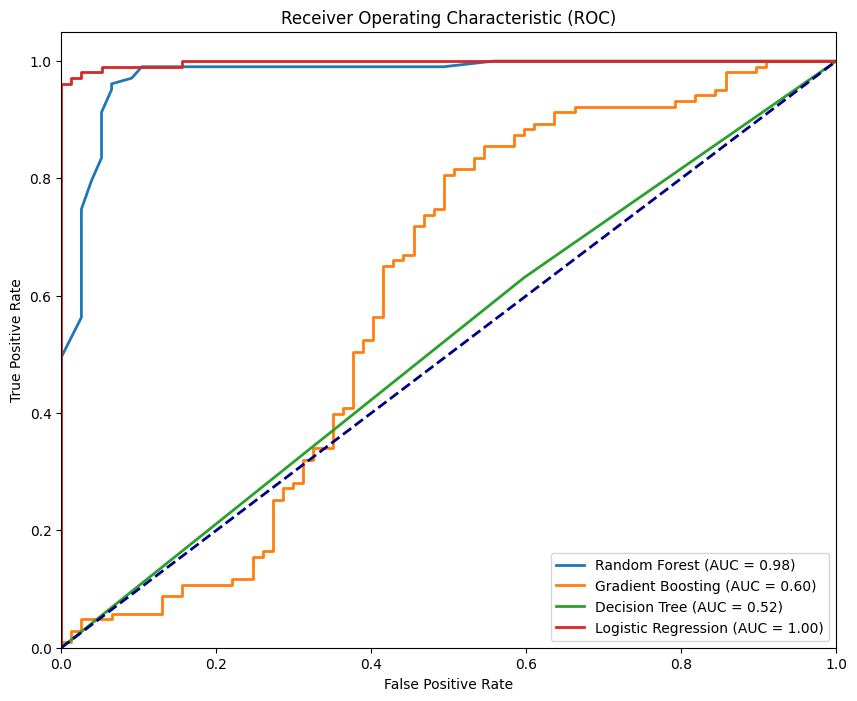

In [43]:
from sklearn.metrics import roc_curve, auc

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions (labels)
    y_pred = model.predict(X_test)

    # Get prediction probabilities (for ROC curve)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Evaluate the model
    report = classification_report(y_test, y_pred)

    # Return classification report and predicted probabilities
    return report, y_pred_proba

# Initialize models
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)

# Create a dictionary to store classification reports
model_reports = {}
y_pred_proba_dict = {}

# Train and evaluate each model
print("Now.... RF")
model_reports['Random Forest'], y_pred_proba_dict['Random Forest'] = train_and_evaluate_model(random_forest, X_train, y_train, X_test, y_test)

print("Now.... GB")
model_reports['Gradient Boosting'], y_pred_proba_dict['Gradient Boosting'] = train_and_evaluate_model(gradient_boosting, X_train, y_train, X_test, y_test)

print("Now.... DT")
model_reports['Decision Tree'], y_pred_proba_dict['Decision Tree'] = train_and_evaluate_model(decision_tree, X_train, y_train, X_test, y_test)

print("Now.... Logistic Regression")
model_reports['Logistic Regression'], y_pred_proba_dict['Logistic Regression'] = train_and_evaluate_model(logistic_regression, X_train, y_train, X_test, y_test)

# Save the classification reports to a CSV file
reports_df = pd.DataFrame.from_dict(model_reports, orient='index', columns=['Classification Report'])
reports_df.to_csv('classification_reports.csv')

# Compute ROC curve and AUC for each model
plt.figure(figsize=(10, 8))

for model_name, y_pred_proba in y_pred_proba_dict.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Show plot
plt.show()


### Benchmark Model Selection and Hyperparameter Tuning

Our Benchmark Model Is Logistic Regression

Best Hyperparameters: {'C': 4, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Model Accuracy: 0.9666666666666667

Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        77
           1       0.95      0.99      0.97       103

    accuracy                           0.97       180
   macro avg       0.97      0.96      0.97       180
weighted avg       0.97      0.97      0.97       180



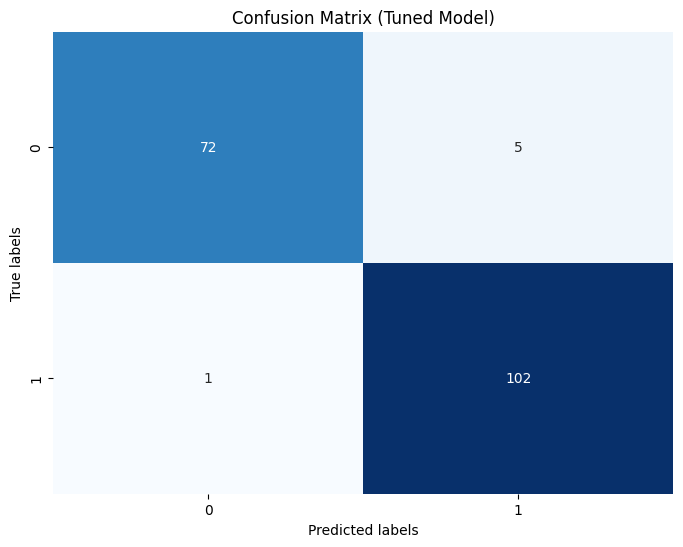

In [44]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 4, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Initialize a Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(lr_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model found by GridSearchCV
best_lr_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_lr_tuned = best_lr_classifier.predict(X_test)

# Calculate and print accuracy using the best model
accuracy_tuned = best_lr_classifier.score(X_test, y_test)
print("Tuned Model Accuracy:", accuracy_tuned)

# Generate a classification report using the tuned model
report_tuned = classification_report(y_test, y_pred_lr_tuned)
print("\nTuned Model Classification Report:\n", report_tuned)

# Calculate confusion matrix using the tuned model
cm_tuned = confusion_matrix(y_test, y_pred_lr_tuned)

# Plot confusion matrix using the tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
best_lr_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = best_lr_classifier.predict(X_train)
y_val_pred = best_lr_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.9763888888888889
Validation Accuracy: 0.9555555555555556


### **Saving the benchmark model using Python's pickle module.**

Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [46]:
import pickle

In [47]:
with open('tuned_lr_model.pkl', 'wb') as file:
    pickle.dump(best_lr_classifier, file)

In [48]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [49]:
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)

# **Flask**

In [50]:
!pip install flask_ngrok pyngrok sentence-transformers

In [51]:
from pyngrok import ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, request, jsonify
!ngrok authtoken "2vFxFXwbkbcH5lpb5uxGcTVJzA3_42FngpBtqYhucbsinTGE3"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [52]:
#Final Flask Code
# Create a function for prediction

from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder
from pyngrok import ngrok

model = SentenceTransformer('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6')

# Load the trained classification model and scaler model
scaler_model = pickle.load(open("/content/drive/MyDrive/AlmaBetter Masters Projects/Voyage Analytics/Gender Classification/scaler.pkl", 'rb'))
pca_model = pickle.load(open("/content/drive/MyDrive/AlmaBetter Masters Projects/Voyage Analytics/Gender Classification/pca.pkl", 'rb'))
logistic_model = pickle.load(open("/content/drive/MyDrive/AlmaBetter Masters Projects/Voyage Analytics/Gender Classification/tuned_lr_model.pkl", 'rb'))

# Create a function for prediction
def predict_price(input_data, lr_model, pca, scaler):
    # Prepare the input data
    text_columns = ['name']

    # Initialize an empty DataFrame
    df = pd.DataFrame([input_data])

    # Encode userCode and company to numeric values
    label_encoder = LabelEncoder()

    df['company_encoded'] = label_encoder.fit_transform(df['company'])
    #df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

    # Encode text-based columns and create embeddings
    for column in text_columns:
        df[column + '_embedding'] = df[column].apply(lambda text: model.encode(text))

    # Apply PCA separately to each text embedding column
    n_components = 23  # Adjust the number of components as needed
    text_embeddings_pca = np.empty((len(df), n_components * len(text_columns)))

    for i, column in enumerate(text_columns):
        embeddings = df[column + '_embedding'].values.tolist()
        embeddings_pca = pca.transform(embeddings)
        text_embeddings_pca[:, i * n_components:(i + 1) * n_components] = embeddings_pca

    # Combine text embeddings with other numerical features if available
    numerical_features = ['code','company_encoded','age']


    X_numerical = df[numerical_features].values

    # Combine PCA-transformed text embeddings and numerical features
    X = np.hstack((text_embeddings_pca, X_numerical))

    # Scale the data using the same scaler used during training
    X = scaler.transform(X)

    # Make predictions using the trained Linear Regression model
    y_pred = lr_model.predict(X)

    return y_pred[0]



app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def predict():
    return """

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Gender Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f9;
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
        }
        .container {
            background-color: #fff;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            padding: 20px;
            max-width: 500px;
            width: 100%;
        }
        .form-group {
            margin-bottom: 15px;
        }
        label {
            display: block;
            margin-bottom: 5px;
            font-weight: bold;
        }
        input[type="text"], input[type="number"] {
            width: 100%;
            padding: 10px;
            border: 1px solid #ccc;
            border-radius: 4px;
        }
        button {
            background-color: #007bff;
            color: #fff;
            padding: 10px 15px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
        }
        button:hover {
            background-color: #0056b3;
        }
        .result {
            margin-top: 20px;
            padding: 10px;
            background-color: #dff0d8;
            border: 1px solid #d0e9c6;
            color: #3c763d;
            border-radius: 4px;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Gender Prediction</h2>
        <form id="prediction-form">
            <div class="form-group">
                <label for="Usercode">User Code</label>
                <input type="text" id="Usercode" name="Usercode" required>
            </div>
            <div class="form-group">
                <label for="company_name">Company Name</label>
                <input type="text" id="company_name" name="company_name" required>
            </div>
            <div class="form-group">
                <label for="Username">User Name</label>
                <input type="text" id="Username" name="Username" required>
            </div>
            <div class="form-group">
                <label for="Traveller_Age">Age</label>
                <input type="number" id="Traveller_Age" name="Traveller_Age" required>
            </div>
            <button type="submit">Predict</button>
        </form>
        <div class="result" id="result" style="display:none;"></div>
    </div>
    <script>
        document.getElementById('prediction-form').addEventListener('submit', function(event) {
            event.preventDefault();
            const formData = new FormData(event.target);
            fetch('/predict', {
                method: 'POST',
                body: formData
            })
            .then(response => response.json())
            .then(data => {
                const resultDiv = document.getElementById('result');
                resultDiv.style.display = 'block';
                resultDiv.textContent = 'Predicted Gender: ' + data.prediction;
            })
            .catch(error => console.error('Error:', error));
        });
    </script>
</body>
</html>



    """




@app.route('/predict', methods=['POST'])
def index():
    if request.method == 'POST':
        # Get input data from the form
        usercode = request.form.get('Usercode')
        company = request.form.get('company_name')
        name = request.form.get('Username')
        age = request.form.get('Traveller_Age')


        # Create a dictionary to store the input data
        data = {
            'code': usercode,
            'company': company,
            'name': name,
            'age': age,

        }

        # Perform prediction using the custom_input dictionary
        prediction = predict_price(data, logistic_model, pca_model, scaler_model)

        if prediction ==0:
            gender='female'
        else:
            gender='male'

        prediction = str(gender)


        return jsonify({'prediction':  prediction})


#if __name__ == "__main__":
#    app.run(host="0.0.0.0", port=8000)

public_url = ngrok.connect(5000)
print("Public URL:", public_url)

app.run(port=5000)

Public URL: NgrokTunnel: "https://cbf6-34-106-151-4.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [14/Apr/2025 13:35:02] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Apr/2025 13:35:03] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [14/Apr/2025 13:35:58] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Apr/2025 13:36:19] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Apr/2025 13:36:35] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Apr/2025 13:36:50] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Apr/2025 13:37:09] "POST /predict HTTP/1.1" 200 -
